In [27]:
#importing os, shutil and glob for copying concrete images from raw folder to the new structure which is 
#required for ImageDataGenerator.flow_from_directory
import os
import shutil
import glob
import numpy as np


import Labels

import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
%matplotlib inline

import random

#import keras and different type of layers for for defining CNN models
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.metrics import Precision, Recall

In [2]:
mainDir = 'picture1/'

In [3]:
all_images_path = os.listdir(mainDir)

In [4]:
crack_images_path = []
uncrack_images_path = []
for imagePath in all_images_path:
    if Labels.getLabel(imagePath) == 0:
        crack_images_path.append(imagePath)
    else:
        uncrack_images_path.append(imagePath)

In [7]:
len(crack_images_path), len(uncrack_images_path)

(4056, 2014)

***************Images of bridge with cracks**********************


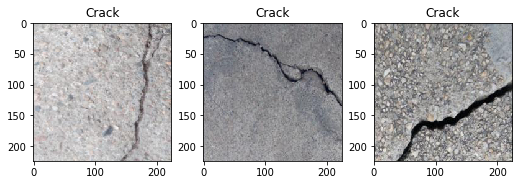

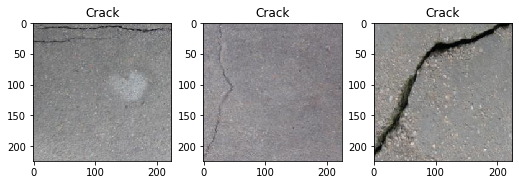

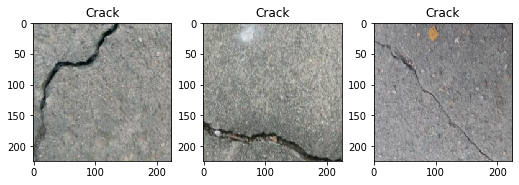

In [9]:
##Displaying images with crack
random_crack_images_indices = np.random.randint(0, len(crack_images_path), 9)
random_crack_images = [crack_images_path[index] for index in random_crack_images_indices]
print('***************Images of bridge with cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, random_crack_images[imindex])))
        axisarr.set_title('Crack')
        imindex += 1
plt.show()

***************Images of bridge without cracks**********************


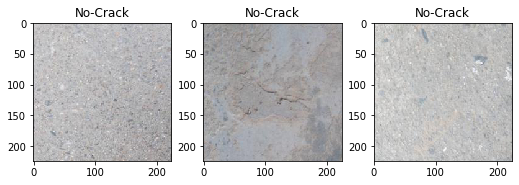

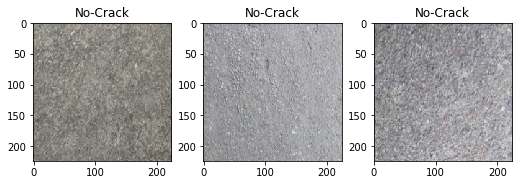

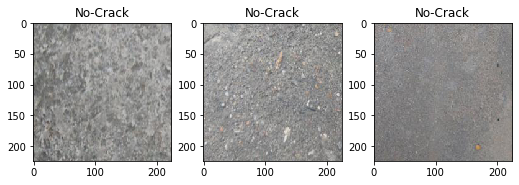

In [11]:
##Displaying images without crack
random_uncrack_images_indices = np.random.randint(0, len(uncrack_images_path), 9)
random_uncrack_images = [uncrack_images_path[index] for index in random_uncrack_images_indices]
print('***************Images of bridge without cracks**********************')
imindex = 0
for i in range(3):
    fig = plt.figure(figsize=(30, 30))
    for j in range(3):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(mpimg.imread(os.path.join(mainDir, random_uncrack_images[imindex])))
        axisarr.set_title('No-Crack')
        imindex += 1
plt.show()

In [13]:
#creating directory structures which is required for our model to train.
#first we will create folders and will store total 8K images(4K images with crack and 4K images without crack)
os.mkdir('data')
os.mkdir('data/train')
os.mkdir('data/test')
os.mkdir('data/visualization')
os.mkdir('data/visualization/real_images')

os.mkdir('data/train/crack')
os.mkdir('data/train/uncrack')
os.mkdir('data/test/crack')
os.mkdir('data/test/uncrack')

In [14]:
crack_images = [os.path.join(mainDir, image) for image in crack_images_path]
uncrack_images = [os.path.join(mainDir, image) for image in uncrack_images_path]

In [16]:
#lets shuffle these images
random.shuffle(crack_images)
random.shuffle(uncrack_images)

In [17]:
#split crack and uncrack images into train, test, validation and visualization
#70% for training and rest 30% for testing(15%), validation(almost 15%), visualization(5 images each from cracks and non-cracks)
train_crack = crack_images[0:3042] 
test_crack = crack_images[3042:4051]
visualization_crack = crack_images[4051:4056]

train_uncrack = uncrack_images[0:1510]
test_uncrack = uncrack_images[1510:2009]
visualization_uncrack = uncrack_images[2009:2014]

In [18]:
#now copy these images into the respective folders
base_dir = 'data/'

#copying train_crack into data/train/crack
for image in train_crack:
    dest = os.path.join(base_dir, 'train/crack/')
    shutil.copy(image, dest)

#copying test_crack into data/test/crack
for image in test_crack:
    dest = os.path.join(base_dir, 'test/crack/')
    shutil.copy(image, dest)
    
#copying visualization_cracl into data/visualization
for image in visualization_crack:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)
    
#copying train_uncrack into data/train/uncrack
for image in train_uncrack:
    dest = os.path.join(base_dir, 'train/uncrack/')
    shutil.copy(image, dest)
    
#copying test_uncrack into data/test/uncrack
for image in test_uncrack:
    dest = os.path.join(base_dir, 'test/uncrack/')
    shutil.copy(image, dest)
    
#copying visualization into data/visualization
for image in visualization_uncrack:
    dest = os.path.join(base_dir, 'visualization/real_images')
    shutil.copy(image, dest)

In [23]:
lenetModel = Sequential()
lenetModel.add(Conv2D(6, (5, 5), strides=(1, 1), padding='valid', input_shape=(224, 224, 3)))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2,2)))

lenetModel.add(Conv2D(16, (5, 5), padding='valid'))
lenetModel.add(Activation('relu'))
lenetModel.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

lenetModel.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
lenetModel.add(Dense(120))
lenetModel.add(Activation('relu'))
lenetModel.add(Dense(units=84))
lenetModel.add(Activation('relu'))

lenetModel.add(Dense(1)) # this our output layer (since this is binary classification of cracked or uncracked, we use only one unit in output layer).
lenetModel.add(Activation('sigmoid'))

lenetModel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])
lenetModel.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 220, 220, 6)       456       
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 6)       0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 110, 110, 6)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 106, 106, 16)      2416      
_________________________________________________________________
activation_2 (Activation)    (None, 106, 106, 16)      0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 53, 53, 16)        0         
_________________________

In [24]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 32

# this is the augmentation configuration we will use for training
#here along with rescaling, we are also changing the orientation of the image in only training dataset, 
#this is we are doing so that our model never sees the same image, and this will help in fighting overfitting.
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
)

# this is the augmentation configuration we will use for testing, validation, visualization:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
visualization_datagen = ImageDataGenerator(rescale=1./255)


# this is a generator that will read pictures found in
# subfolers of 'master_data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 227*227
        batch_size=batch_size,
        class_mode='binary' # since we use binary_crossentropy loss, we need binary labels
) 

# this is a similar generator, for test data
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary'
)

# this is a similar generator, for visualization data
visualization_generator = visualization_datagen.flow_from_directory(
        'data/visualization',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary'
)

Found 4552 images belonging to 2 classes.
Found 1508 images belonging to 2 classes.
Found 10 images belonging to 1 classes.


In [25]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', patience=4, min_delta=0.01)

In [26]:
import time
start_time = time.time() 
lenetModel.fit_generator(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[es]
)
finish_time = time.time()
time_taken = finish_time-start_time
print('\n')
print('Training complete in {:.0f}m {:.0f}s'.format(time_taken // 60, time_taken % 60))


Epoch 1/10
143/143 [==============================] - 61s 429ms/step - loss: 0.4412 - accuracy: 0.7856 - precision_1: 0.8729 - recall_1: 0.4139 - val_loss: 0.3319 - val_accuracy: 0.9237 - val_precision_1: 0.8333 - val_recall_1: 0.9619
Epoch 2/10
143/143 [==============================] - 36s 254ms/step - loss: 0.2492 - accuracy: 0.9082 - precision_1: 0.8109 - recall_1: 0.9430 - val_loss: 0.0481 - val_accuracy: 0.9118 - val_precision_1: 0.7952 - val_recall_1: 0.9880
Epoch 3/10
143/143 [==============================] - 38s 264ms/step - loss: 0.2884 - accuracy: 0.8792 - precision_1: 0.7548 - recall_1: 0.9417 - val_loss: 0.2733 - val_accuracy: 0.8150 - val_precision_1: 0.6418 - val_recall_1: 0.9980
Epoch 4/10
143/143 [==============================] - 38s 266ms/step - loss: 0.2372 - accuracy: 0.9060 - precision_1: 0.8153 - recall_1: 0.9265 - val_loss: 0.1207 - val_accuracy: 0.9264 - val_precision_1: 0.9025 - val_recall_1: 0.8717
Epoch 5/10
143/143 [==============================] - 38s 2

In [28]:
test_loss, accuracy, precision, recall = lenetModel.evaluate_generator(test_generator)

In [29]:
print(' accuracy : ', accuracy, '\n', 'precision : ', precision, '\n', 'recall : ', recall)

 accuracy :  0.9297082424163818 
 precision :  0.9207708835601807 
 recall :  0.8617234230041504


In [30]:
imgarr = visualization_generator[0][0]
imgarr.shape

(10, 224, 224, 3)

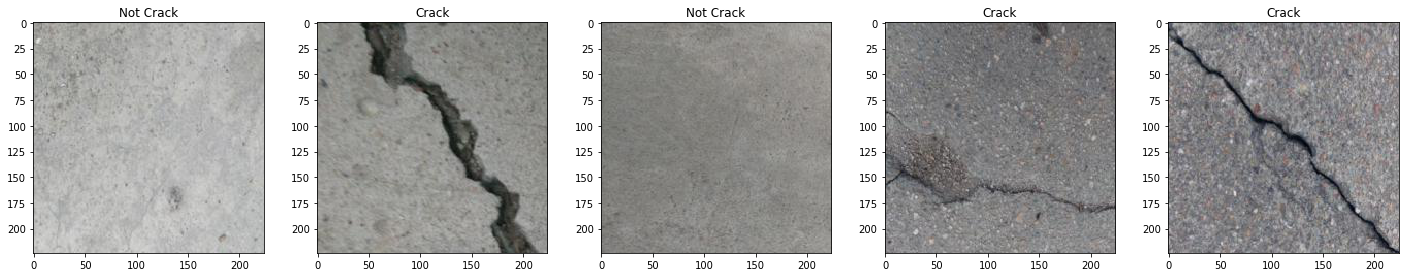

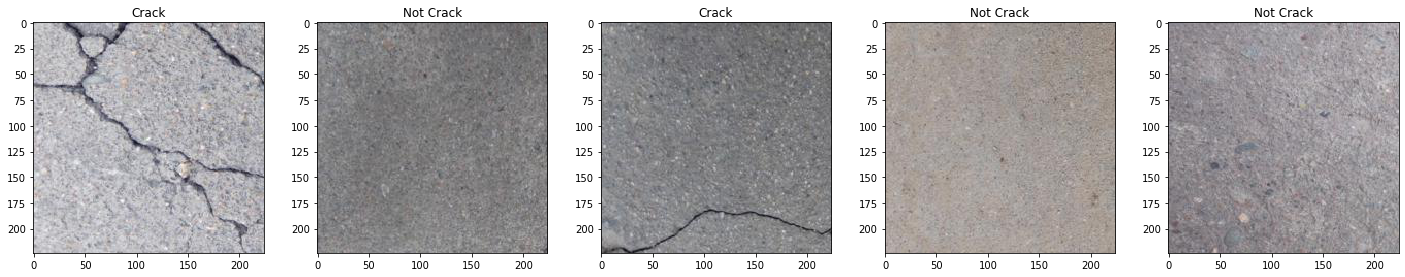

In [31]:
predictions = lenetModel.predict(imgarr)
pred_class_arr = np.array(predictions).round()
counter = 0
for i in range(2):
    fig = plt.figure(figsize=(50, 50))
    for j in range(5):
        axisarr = fig.add_subplot(10, 10, j+1)
        axisarr.imshow(imgarr[counter])
        if(pred_class_arr[counter] == 0):
            axisarr.set_title('Crack')
        else:
            axisarr.set_title('Not Crack')
        counter += 1

In [32]:
random_image_path = os.path.join('raw_images', '20200727_154649.jpg')

In [33]:
def highlight_cracks(im, model):
    output_image = np.zeros_like(im)
    a = 0
    for i in range(12):
        k = 0
        for j in range(12):
            p = im[a:a+100, k:k+100]
            resizeIm = cv2.resize(p, (224, 224))
            im_arr = np.zeros((1, 224, 224, 3))
            im_arr[0] = resizeIm
            pred = model.predict(im_arr)
            prediction = np.array(pred).round()
            if(prediction == 0):
                color = (255, 26, 26)
            else:
                color = (153, 255, 153)
            b = np.zeros_like(p, dtype=np.uint8)
            b[:] = color
            add_img = cv2.addWeighted(p, 0.83, b, 0.17, 0)
            output_image[a:a+100, k:k+100] = add_img
            k += 100
        a += 100
    return output_image

Text(0.5, 1.0, 'Crack Highlighted Image')

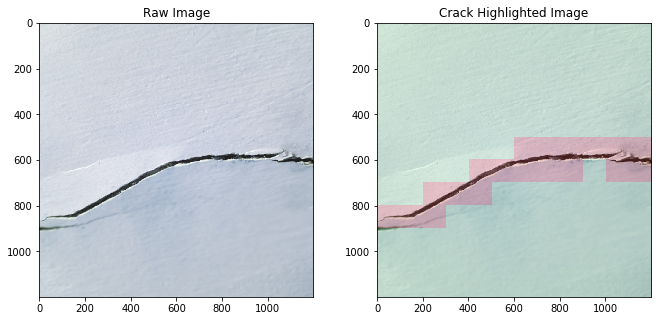

In [34]:
im = cv2.imread(random_image_path)
im = cv2.resize(im, (1200, 1200))
crack_highlighted_image = highlight_cracks(im, lenetModel)
fig = plt.figure(figsize=(120, 120))
axisarr = fig.add_subplot(20, 20, 1)
axisarr.imshow(im)
axisarr.set_title('Raw Image')

axisarr = fig.add_subplot(20, 20, 2)
axisarr.imshow(crack_highlighted_image)
axisarr.set_title('Crack Highlighted Image')

In [35]:
#save the model
lenetModel.save(
    'lenet_model.h5',
    overwrite=True,
    include_optimizer=True,
)

In [36]:
lenetModel.save_weights('lenetModelWeights.h5')